In [14]:
import requests
import json
import pandas as pd
%matplotlib inline

In [15]:
def fetch_councillor(id_):
    url = "http://ws-old.parlament.ch/votes/councillors/" + str(id_)
    print(url)
    params = dict(
        format='json'
    )
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'
    }
    resp = requests.get(url=url, params=params, headers=headers)
    return resp

In [16]:
conseil_dict = {
    "Ignazio Cassis" : 2664,
    "Doris Leuthard" : 2510,
    "Ueli Maurer" : 2310,
    "Johann Schneider-Ammann" : 2530,
    "Christoph Blocher" : 2017,
    "Guy Parmelin" : 2621,
    "Didier Burkhalter" : 2589,
}

In [17]:
votes = []
for k, v in conseil_dict.items():
    votes.append(fetch_councillor(v))
    

http://ws-old.parlament.ch/votes/councillors/2589
http://ws-old.parlament.ch/votes/councillors/2664
http://ws-old.parlament.ch/votes/councillors/2621
http://ws-old.parlament.ch/votes/councillors/2530
http://ws-old.parlament.ch/votes/councillors/2510
http://ws-old.parlament.ch/votes/councillors/2017
http://ws-old.parlament.ch/votes/councillors/2310


In [18]:
votes

[<Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>]

In [19]:
df = pd.DataFrame()
for v in votes:
    if v.status_code == requests.codes.ok:
        j = v.json()
        for vote in j['affairVotes']:  
            df.loc[vote['id'], j['id']] = vote['councillorVote']['decision']
        

In [20]:
df

,2589,2664,2621,2530,2510,2017,2310
1492,No,NaN,No,No,Yes,NaN,No
1503,No,NaN,EH,NT,No,NaN,NT
1504,No,NaN,No,NT,No,NaN,No
1505,Yes,NaN,No,NT,Yes,NaN,No
1506,No,NaN,No,NT,Yes,NaN,No
1507,No,NaN,EH,NT,No,NaN,EH
1508,No,NaN,No,NT,Yes,NaN,No
1509,Yes,NaN,No,NT,Yes,NaN,No
1510,No,NaN,No,NT,Yes,NaN,No
1511,No,NaN,No,NT,Yes,NaN,No


In [21]:
# EH = Abstention
# ES = Absent
# NT = Not participated
# P  = President

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(graph, df):
    # extract nodes from graph
    nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])

    # create networkx graph
    G=nx.Graph()
    G.position = {}

    # add nodes
    for node in nodes:
        G.add_node(node)

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    
    # draw graph
    pos=nx.spring_layout(G)
    color_map = []
    ids = df.columns.values
    for node in G:
        if node in ids:
            color_map.append('blue')
        else: 
            color_map.append('green')  
    nx.draw(G, pos, node_color=color_map)

    # show graph
    plt.show()

In [23]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [24]:
# draw example
edges = []
for c in df:
    votes = df[c]
    edges += [(c, id_) for id_ in df.index.tolist() if votes.loc[id_] == 'Yes']

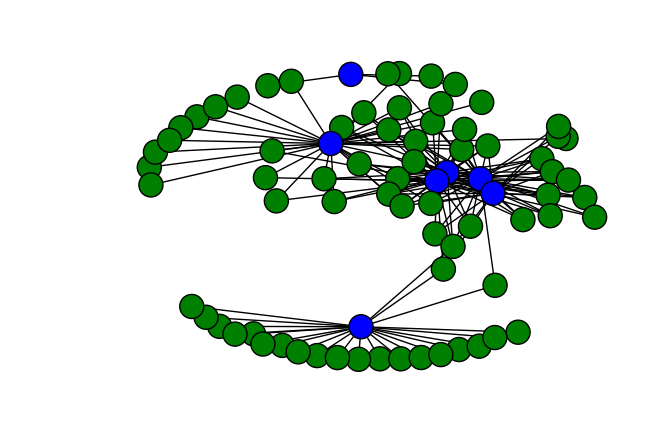

In [25]:
# draw example
draw_graph(edges, df)

In [26]:
from sklearn.decomposition import NMF

In [28]:
to_replace = ['Yes', 'No', 'P', 'EH', 'ES', 'NT']
replace_by = range(1,len(to_replace)+1)
clean_df = df.replace(to_replace, replace_by)
clean_df = clean_df.fillna(0)
clean_df

,2589,2664,2621,2530,2510,2017,2310
1492,2.0,0.0,2.0,2.0,1.0,0.0,2.0
1503,2.0,0.0,4.0,6.0,2.0,0.0,6.0
1504,2.0,0.0,2.0,6.0,2.0,0.0,2.0
1505,1.0,0.0,2.0,6.0,1.0,0.0,2.0
1506,2.0,0.0,2.0,6.0,1.0,0.0,2.0
1507,2.0,0.0,4.0,6.0,2.0,0.0,4.0
1508,2.0,0.0,2.0,6.0,1.0,0.0,2.0
1509,1.0,0.0,2.0,6.0,1.0,0.0,2.0
1510,2.0,0.0,2.0,6.0,1.0,0.0,2.0
1511,2.0,0.0,2.0,6.0,1.0,0.0,2.0


In [29]:
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(clean_df)
H = model.components_

In [30]:
H.shape

(2, 7)

In [31]:
W.shape

(139, 2)

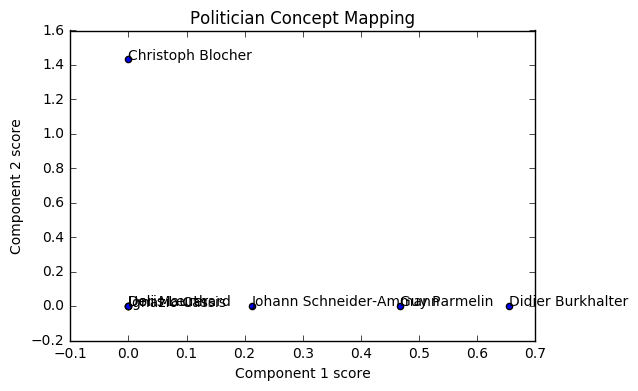

In [66]:
plt.title("Politician Concept Mapping")
x = H[0,:]
y = H[1,:]
plt.scatter(x,y)
plt.xlabel("Component 1 score")
plt.ylabel("Component 2 score")
for i,c in enumerate(conseil_dict):
    plt.annotate(c, (H[0,:][i], H[1,:][i]))
plt.show()

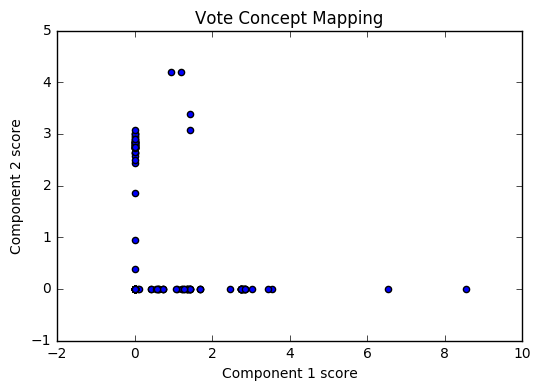

In [67]:
plt.title("Vote Concept Mapping")
x = W[:,0]
y = W[:,1]
plt.scatter(x,y)
plt.xlabel("Component 1 score")
plt.ylabel("Component 2 score")
plt.show()

In [68]:
model = NMF(n_components=7, init='random', random_state=0)
W = model.fit_transform(clean_df)
H = model.components_

In [95]:
from sklearn.metrics import mean_squared_error

nR = np.dot(W,H)
mean_squared_error(clean_df.values.flatten(), list(nR.flatten()))

0.03009009657525874

In [69]:
from sklearn.manifold import TSNE

In [70]:
W_embedded = TSNE(n_components=2).fit_transform(W)
H_embedded = TSNE(n_components=2).fit_transform(H)

In [85]:
H_embedded.shape, W_embedded.shape

((7, 2), (139, 2))

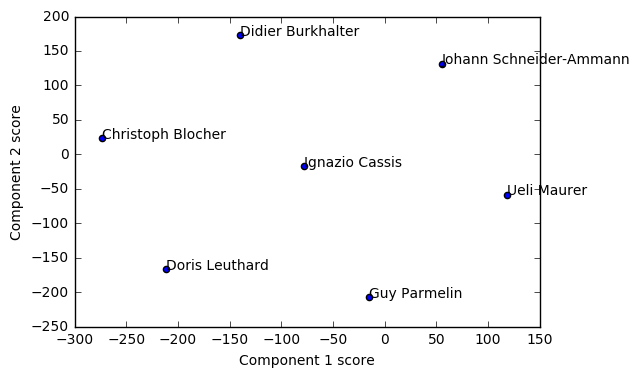

In [74]:
plt.title("Politician Concept Mapping")
x = H_embedded[:,0]
y = H_embedded[:,1]
plt.scatter(x,y)
plt.xlabel("Component 1 score")
plt.ylabel("Component 2 score")
for i,c in enumerate(conseil_dict):
    plt.annotate(c, (H_embedded[:,0][i], H_embedded[:,1][i]))
plt.show()

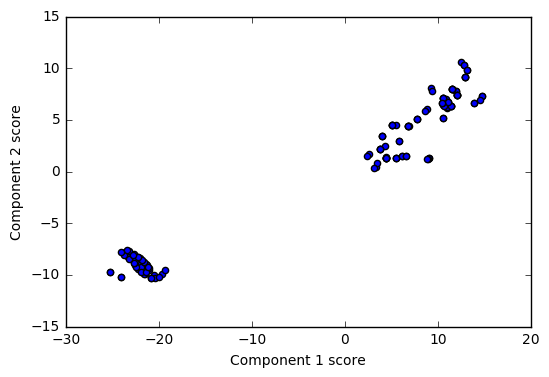

In [75]:
plt.title("Vote Concept Mapping")
x = W_embedded[:,0]
y = W_embedded[:,1]
plt.scatter(x,y)
plt.xlabel("Component 1 score")
plt.ylabel("Component 2 score")
plt.show()

In [81]:
#SVD
import numpy as np
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(clean_df - np.mean(clean_df), k = min(clean_df.shape)-1)

In [83]:
U.shape, Vt.shape

((139, 6), (6, 7))

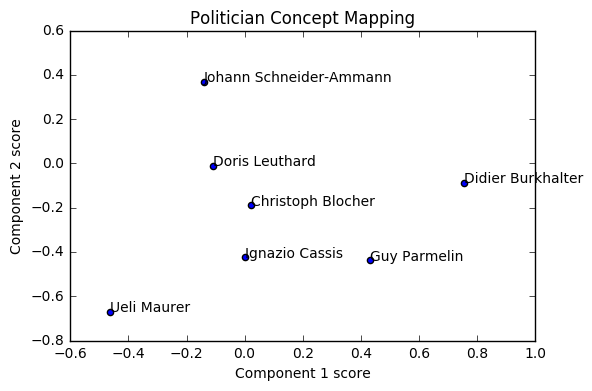

In [84]:
plt.title("Politician Concept Mapping")
x = Vt[0,:]
y = Vt[1,:]
plt.scatter(x,y)
plt.xlabel("Component 1 score")
plt.ylabel("Component 2 score")
for i,c in enumerate(conseil_dict):
    plt.annotate(c, (Vt[0,:][i], Vt[1,:][i]))
plt.show()